# Sustainable energy companies and its comparison to standard ones

##  Data analysis and visualisation part
In this module, user insterts the timeframe that he want to observe and also can create two portfolios, that will be analyzed and compared, the portfolios will be created by specifing codes of stocks and than downloaded from yahoo finance

In [5]:
#popisná statistika - datasetů, vizualizace, vytvoření portfolia + analýza
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime as dt
import yfinance as yf
import seaborn as sns
import functools as reduce


## Loading the Data 

- to see detatiled info on data that we use, see documentation
- We will take some of the biggest renewable Energy Companies in the World and create on portfolio from them
- And we will also take some of the largest energy companies that do not focus maily on sustainable resouces
- more details: frequency: daily, historical prices, time period: last 5Y

In [6]:
# myslím, že to máš upravit dle poznámek z hovoru (něco s dokumetací té funkce)
# Function to extract stock data we want
def get_stock_data(tickers, num_days_back, info_type):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days = num_days_back)
    
    # Initialize a dataframe to store stock data
    df = pd.DataFrame()
    
    # For each stock, download the desired information
    for ticker in tickers:
        data = yf.download(ticker, start = start_date, end = end_date)
        df[ticker] = data[info_type]
    
    return df

In [7]:
# Stocks/Tickers we want to analyze
first_dataset= ["AQN", "BEPC", "CEG", "CSIQ", "DQ", "GE", "IBDRY", "JKS", "NEE", "VWDRY"]
# Get Adjusted Close prices
sustainable = get_stock_data(tickers = first_dataset, num_days_back = 1000, info_type = "Adj Close")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
def analyze_dataset(df, summary_stat=False, data_quality=False, exploratory_analysis=False):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The provided input is not appropriate DataFrame.")

    # Summary Statistics
    if summary_stat: 
        print("Shape of the DataFrame:", df.shape)
        print("First 5 rows of the DataFrame:")
        print(df.head(5))
        print("DataFrame Info:")
        print(df.info())
        print("Descriptive Statistics:")
        print(df.describe())

    # Data Quality Check
    if data_quality:
        print("Number of missing values in each column:")
        print(df.isna().sum())
        print("Duplicate rows in the DataFrame:")
        print(df[df.duplicated()])

    # Exploratory Analysis
    if exploratory_analysis:
        # Graph of Stocks
        plt.figure(figsize=(15, 6))
        for column in df.columns:
            plt.plot(df.index, df[column], label=column)
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value')
        plt.title('Selected Asset Values Over Time')
        plt.legend()
        plt.show()

        # Each Stock Alone
        nrows = 2
        ncols = 5
        fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))
        axes = axes.flatten()
        for i, column in enumerate(df.columns):
            axes[i].plot(df.index, df[column])
            axes[i].set_title(column, fontsize=10)
            axes[i].set_xlabel('Date', fontsize=8)
            axes[i].set_ylabel('Value', fontsize=8)
            axes[i].tick_params(axis='x', labelrotation=45)
        plt.subplots_adjust(hspace=0.5, wspace=0.3)
        plt.tight_layout(pad=3.0)
        plt.show()

        # Box Plot Distribution Analysis
        print("Box plot for distribution analysis")
        ax = df.plot(kind='box')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.tick_params(axis='x', labelsize=8)
        plt.show()

        # Heatmap for Correlation Between Assets
        print("Heatmap for Correlation Between Assets")
        correlation_matrix = df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True)
        plt.tight_layout()
        plt.show()


Shape of the DataFrame: (688, 10)
First 5 rows of the DataFrame:
                  AQN       BEPC  CEG       CSIQ         DQ         GE  \
Date                                                                     
2021-05-11  13.245526  34.790997  NaN  38.110001  75.459999  80.957634   
2021-05-12  12.828948  34.115524  NaN  35.549999  72.370003  79.287758   
2021-05-13  12.871456  33.773289  NaN  35.250000  65.110001  80.215469   
2021-05-14  13.058493  35.484470  NaN  36.619999  71.730003  82.009033   
2021-05-17  12.930969  35.907764  NaN  36.099998  71.239998  81.328712   

                IBDRY        JKS        NEE      VWDRY  
Date                                                    
2021-05-11  48.252937  30.024296  69.533119  12.377625  
2021-05-12  46.928417  29.191885  67.158081  12.148041  
2021-05-13  47.831894  29.383242  68.181305  12.527355  
2021-05-14  48.410824  30.110409  68.641304  12.577266  
2021-05-17  48.559944  29.124908  67.496040  12.447500  
DataFrame Info:
<

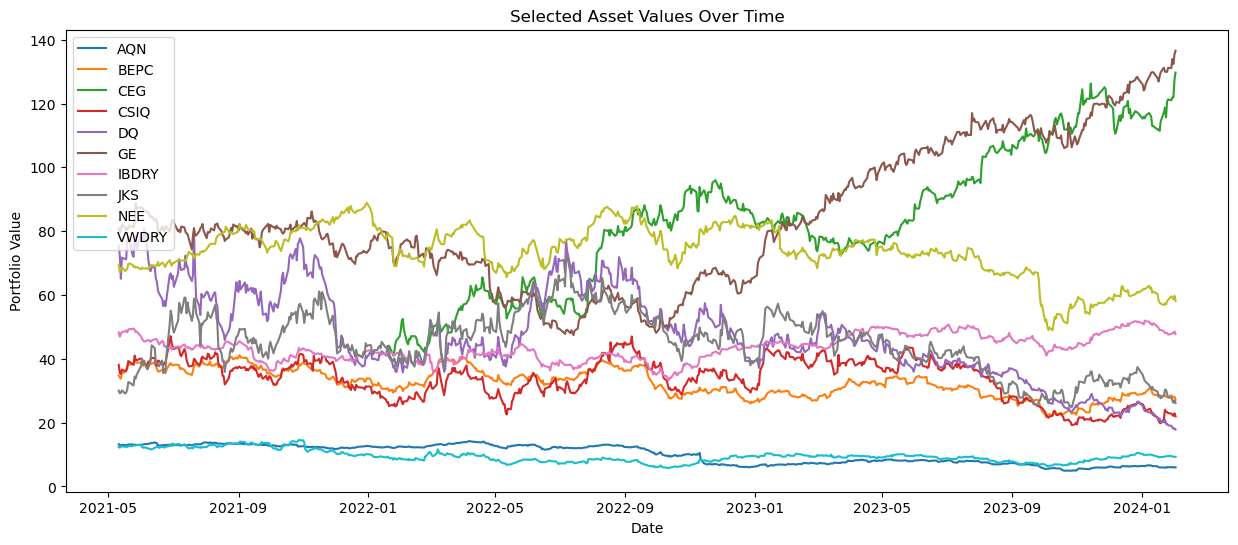

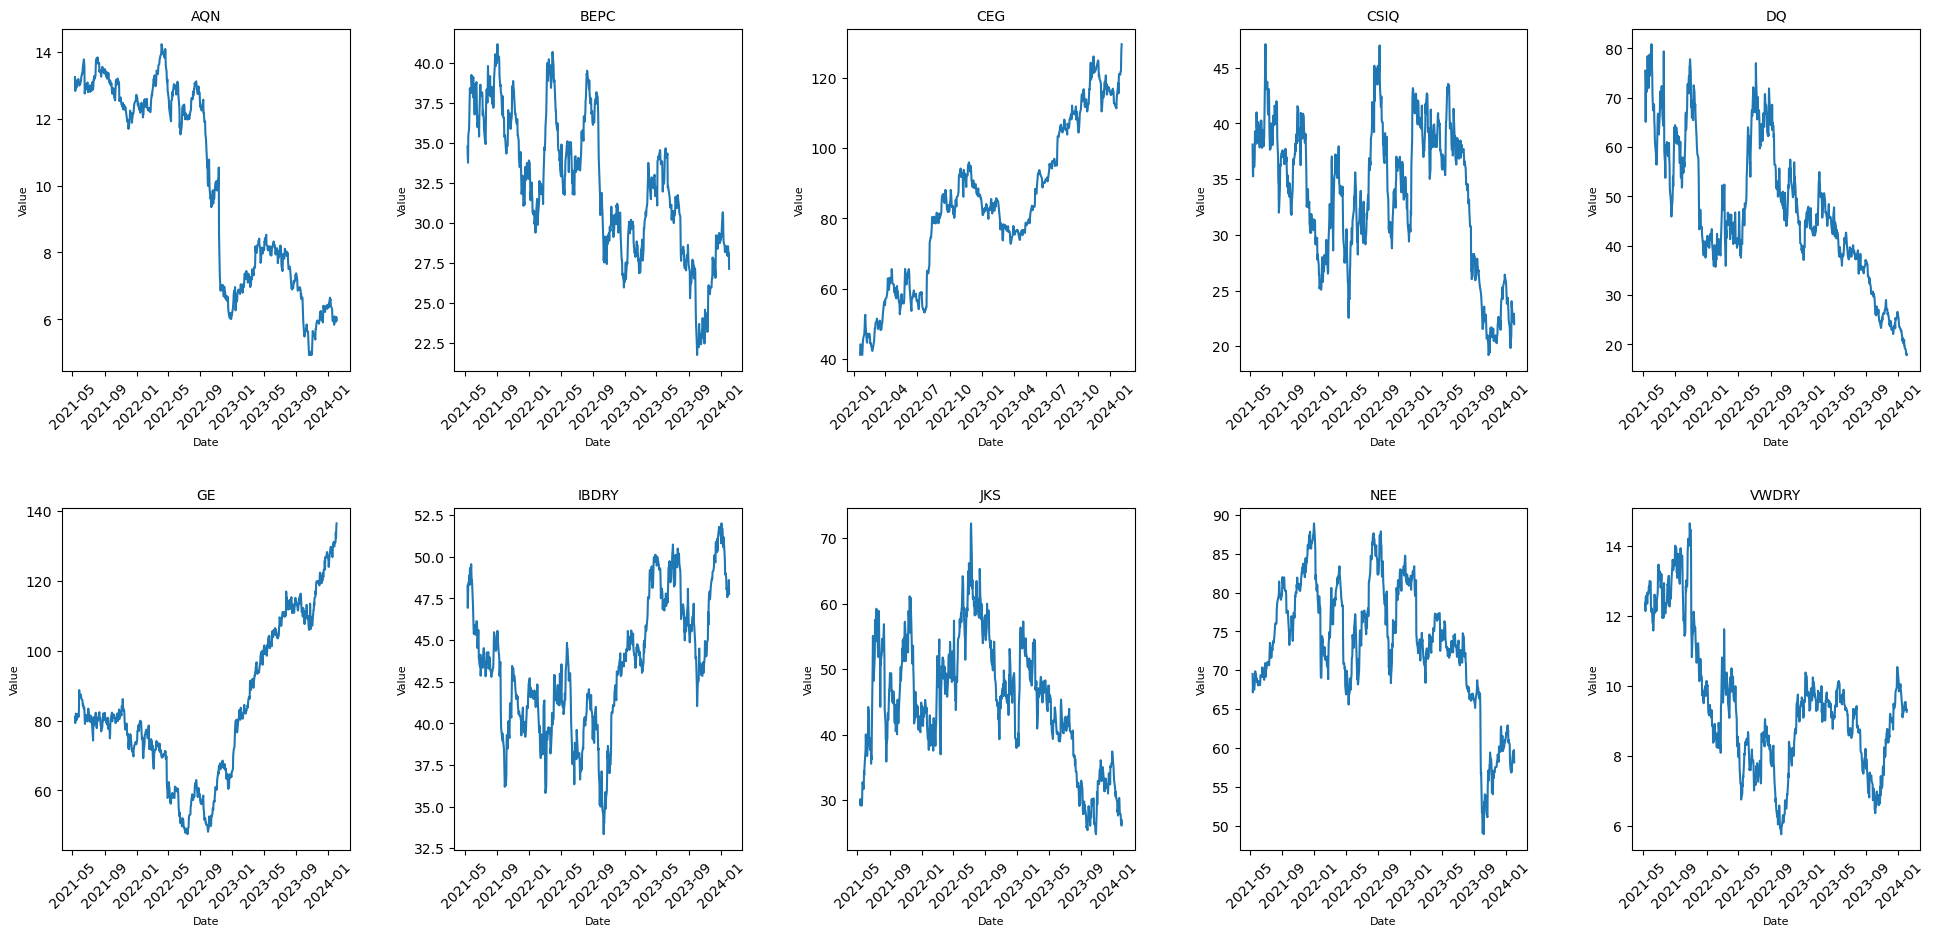

Box plot for distribution analysis


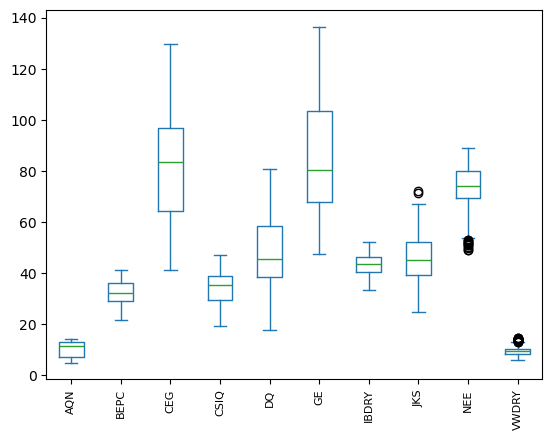

Heatmap for Correlation Between Assets


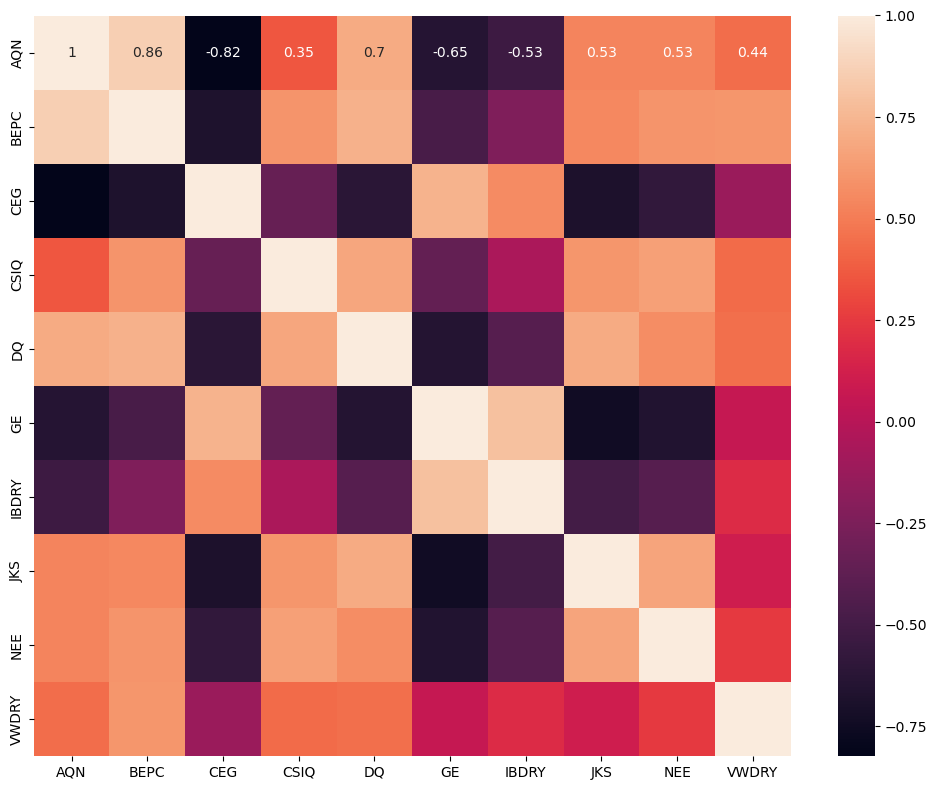

In [11]:
analyze_dataset(sustainable, summary_stat= True, data_quality = True, exploratory_analysis= True)

### Sustainable dataset = defining first dataset

In [77]:
# Stocks/Tickers we want to analyze
first_dataset= ["AQN", "BEPC", "CEG", "CSIQ", "DQ", "GE", "IBDRY", "JKS", "NEE", "VWDRY"]
# Get Adjusted Close prices
df_sustain = get_stock_data(tickers = first_porfolio, num_days_back = 1000, info_type = "Adj Close")
df=df_sustain

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Unsustainable portfolio = defining second protfolio

In [61]:
# Unsustainable companies tickers
second_portfolio = ["EQNR", "BP", "0857.HK", "COP", "FP.VI", "SHEL", "CVX", "SR", "ENEL.MI"]

# Get the data -> ENEL and PETROCHINA not Found
df_unsustain = get_stock_data(tickers = second_porfolio, num_days_back = 1000, info_type = "Adj Close")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Explanatory data analysis

#### Exploring sustainable porfolio 

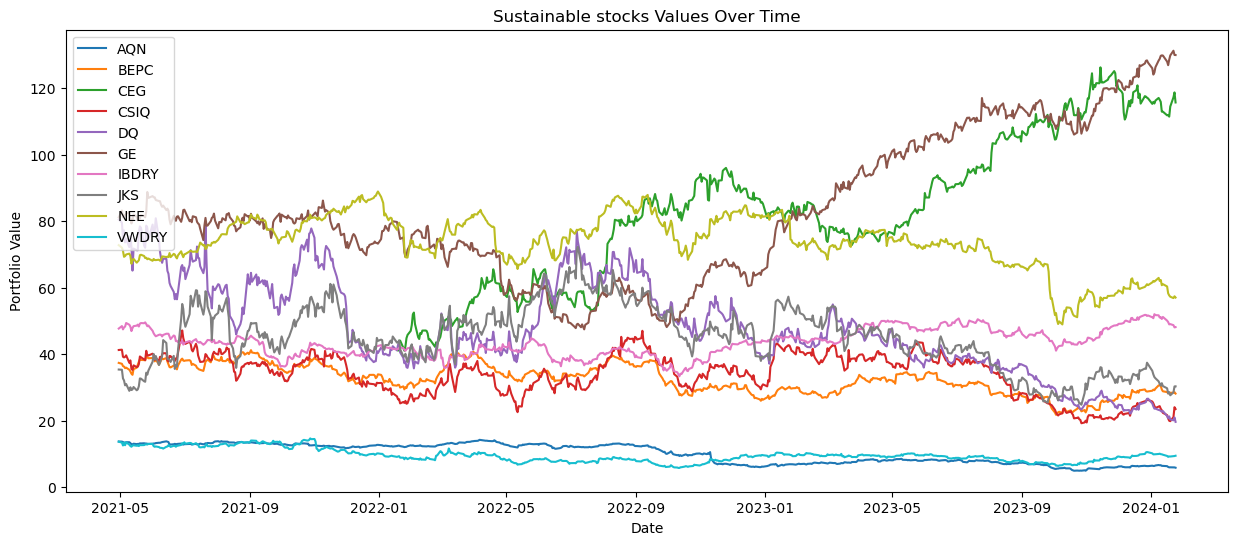

In [28]:
#graph of sustainable stocks separately
plt.figure(figsize=(15, 6))
for column in df_sustain.columns:
    plt.plot(df_sustain.index, df_sustain[column], label=column)
    plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Sustainable stocks Values Over Time')
plt.legend()
plt.show()

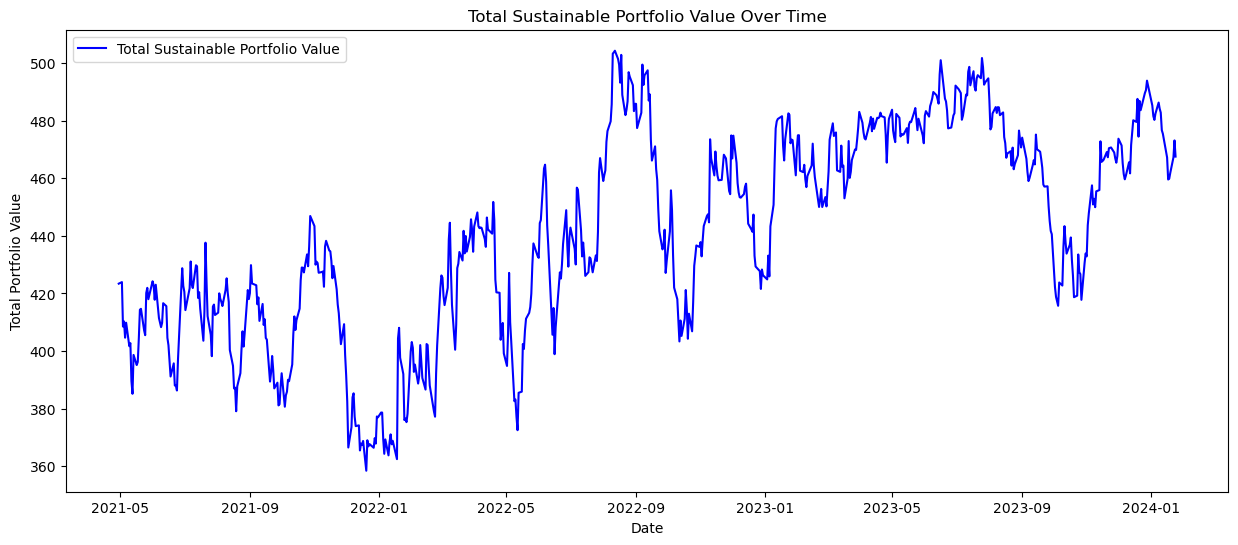

In [29]:
#graph of sustainable stocks colectively
# Summing the data across columns
total_portfolio = df_sustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data
plt.plot(total_portfolio.index, total_portfolio, label='Total Sustainable Portfolio Value', color="blue")

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Total Sustainable Portfolio Value Over Time')
plt.legend()

# Displaying the plot
plt.show()

### Graph for each share

#### Exploring unsustainable porfolio 

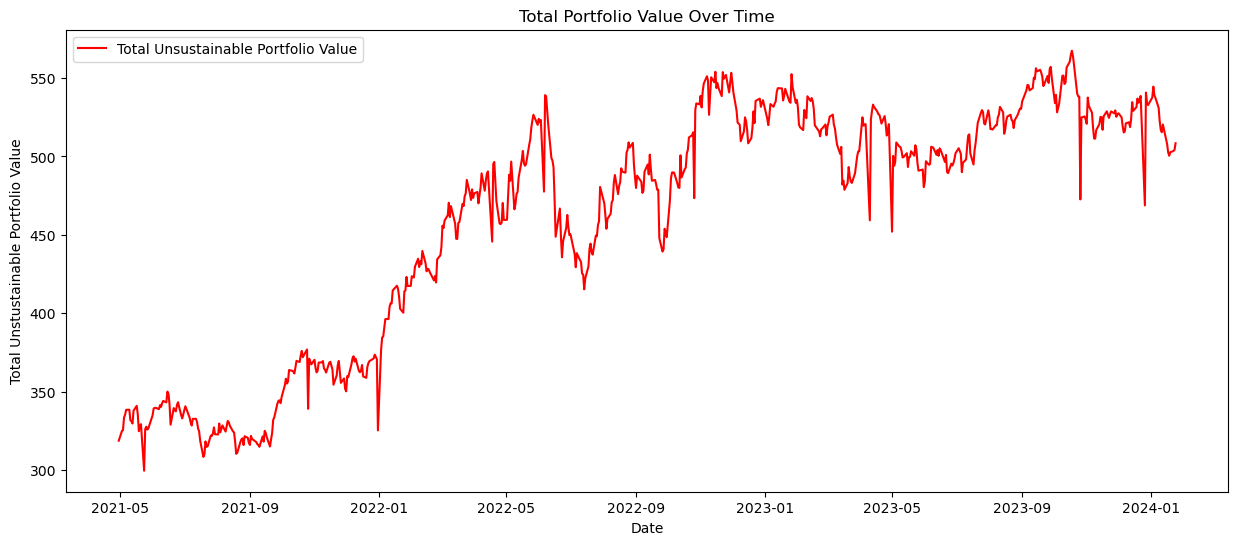

In [32]:
# Stotal portfolio
total_un_portfolio = df_unsustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data
plt.plot(total_un_portfolio.index, total_un_portfolio, label='Total Unsustainable Portfolio Value', color="red")

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Unstustainable Portfolio Value')
plt.title('Total Portfolio Value Over Time')
plt.legend()

# Displaying the plot
plt.show()

#### Combination of both portfolios

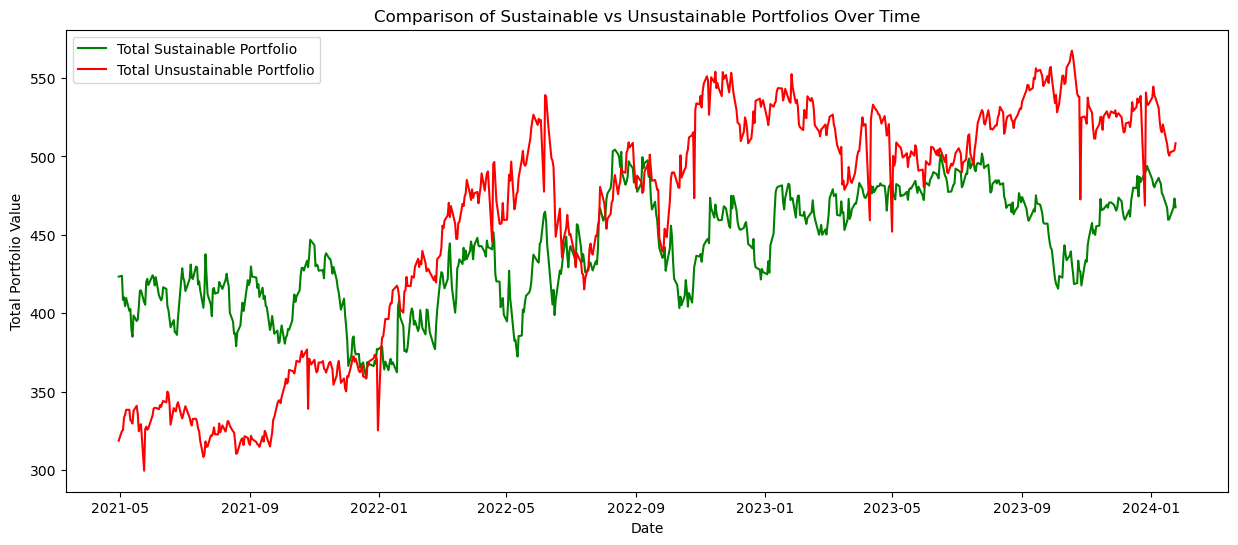

In [34]:
# Summing the data across columns for both DataFrames
total_sustain = df_sustain.sum(axis=1)
total_unsustain = df_unsustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data for both DataFrames
plt.plot(total_sustain.index, total_sustain, label='Total Sustainable Portfolio', color='green')
plt.plot(total_unsustain.index, total_unsustain, label='Total Unsustainable Portfolio', color='red')

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Comparison of Sustainable vs Unsustainable Portfolios Over Time')
plt.legend()

# Displaying the plot
plt.show()

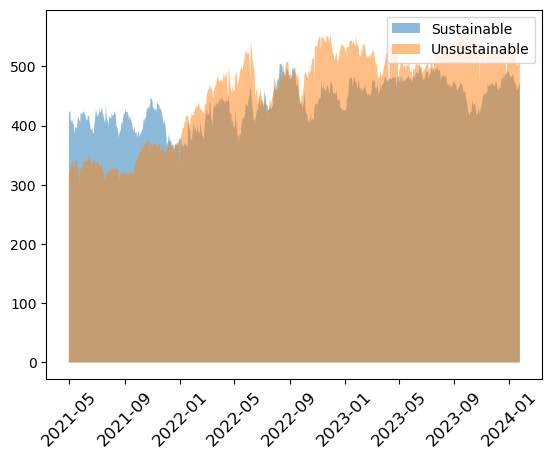

In [42]:
#An area plot can be used to display the cumulative values over time, showing how each portfolio's total value grows.
#This can be particularly effective in highlighting the growth difference between the two portfolios.

plt.fill_between(total_sustain.index, total_sustain, label='Sustainable', alpha=0.5)
plt.fill_between(total_unsustain.index, total_unsustain, label='Unsustainable', alpha=0.5)

# Improving the X-axis labels
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tick_params(axis='x', labelsize=12)  # Decrease font size of labels 
# Displaying the plot
plt.legend()
plt.show()


In [44]:
# Bar Chart for Comparing Specific Intervals
monthly_sustain = df_sustain.resample('M').mean()
monthly_unsustain = df_unsustain.resample('M').mean()


<Axes: xlabel='Date'>

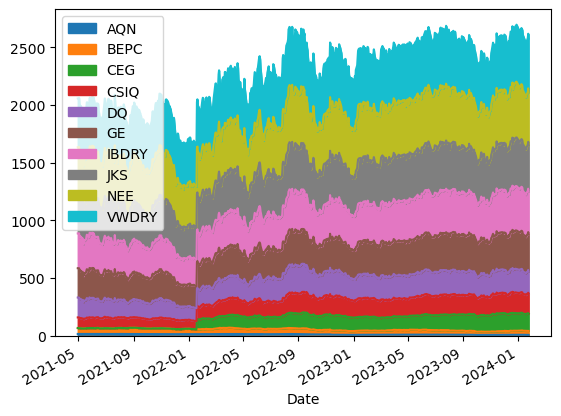

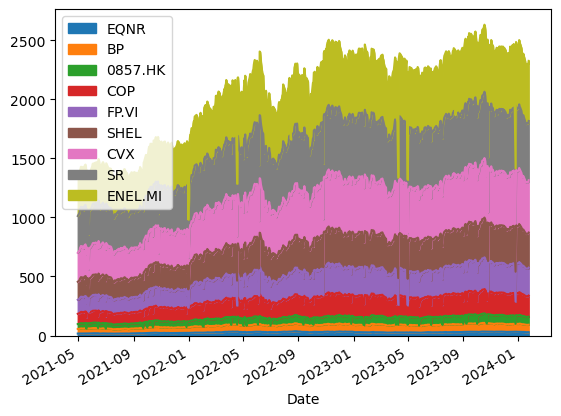

In [53]:
# Stacked Line or Area Chart for Portfolio Composition
df_sustain.cumsum(axis=1).plot(kind='area')
df_unsustain.cumsum(axis=1).plot(kind='area')
